<div style="text-align:center; border-radius:15px; padding:15px; color:#FFC0CB; margin:0; font-size:150%; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><b>Global COVID-19 Fatalities Analysis</b></div>

The COVID-19 pandemic has been one of the most significant global events in recent history, affecting millions of lives worldwide. Understanding the patterns and trends in fatalities can provide valuable insights for future preparedness and response strategies.

If you find this notebook insightful, please consider upvoting it.

## Table of Contents
- [Introduction](#Introduction)
- [Data Overview](#Data-Overview)
- [Data Preprocessing](#Data-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Descriptive Statistics](#Descriptive-Statistics)
  - [Time Series Analysis](#Time-Series-Analysis)
  - [Geographical Analysis](#Geographical-Analysis)
- [Predictive Modeling](#Predictive-Modeling)
  - [Model Training](#Model-Training)
  - [Model Evaluation](#Model-Evaluation)
- [Discussion and Conclusion](#Discussion-and-Conclusion)

## Introduction

In this notebook, we will delve into the global COVID-19 fatalities data to uncover trends and patterns. We will explore the data through various visualizations and build a predictive model to forecast future fatalities. Let's begin by loading the data and taking a closer look at its structure.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Data Overview

Let's load the data and examine its structure to understand what we're working with.

In [10]:
file_path = '/kaggle/input/covid-19-fatalities-data/data_global_data.csv'
df = pd.read_csv(file_path)
df.head()

,country,date,deaths,daily_deaths
0,Afghanistan,01/23/20,0,0.0
1,Afghanistan,01/24/20,0,0.0
2,Afghanistan,01/25/20,0,0.0
3,Afghanistan,01/26/20,0,0.0
4,Afghanistan,01/27/20,0,0.0


## Data Preprocessing

Before diving into analysis, we need to preprocess the data. This includes handling missing values, converting data types, and creating any additional features that might be useful.

In [3]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Check for missing values
df.isnull().sum()

country         0
date            0
deaths          0
daily_deaths    0
dtype: int64

## Exploratory Data Analysis

### Descriptive Statistics

Let's start by looking at some basic statistics of the dataset.

In [4]:
df.describe()

,date,deaths,daily_deaths
count,218286,2.182860e+05,218286.000000
mean,2021-07-18 12:00:00.000000256,1.849231e+04,30.814629
min,2020-01-23 00:00:00,0.000000e+00,0.000000
25%,2020-10-20 00:00:00,3.900000e+01,0.000000
50%,2021-07-18 12:00:00,7.250000e+02,0.000000
75%,2022-04-16 00:00:00,6.872000e+03,6.000000
max,2023-01-12 00:00:00,1.099488e+06,11447.000000
std,NaN,7.371275e+04,161.716805


### Time Series Analysis

Analyzing the trend of fatalities over time can provide insights into the progression of the pandemic.

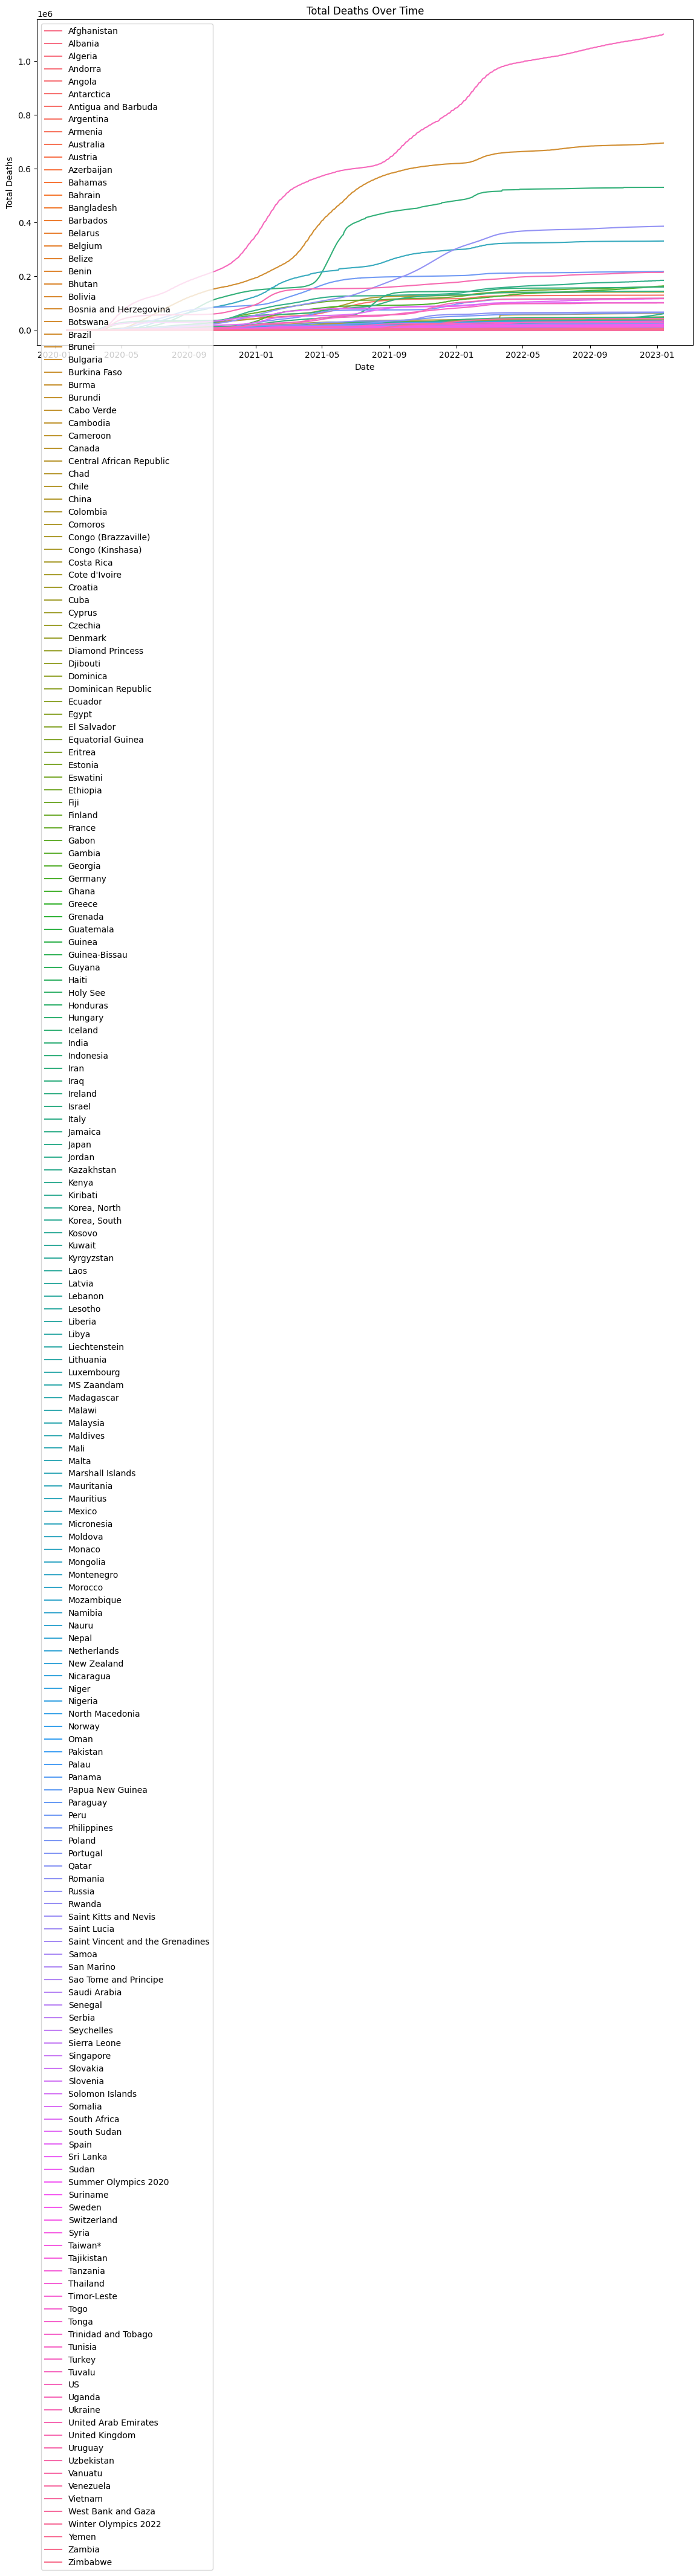

In [5]:
# Plot total deaths over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='deaths', hue='country')
plt.title('Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(loc='upper left')
plt.show()

### Geographical Analysis

Let's explore the distribution of fatalities across different countries.

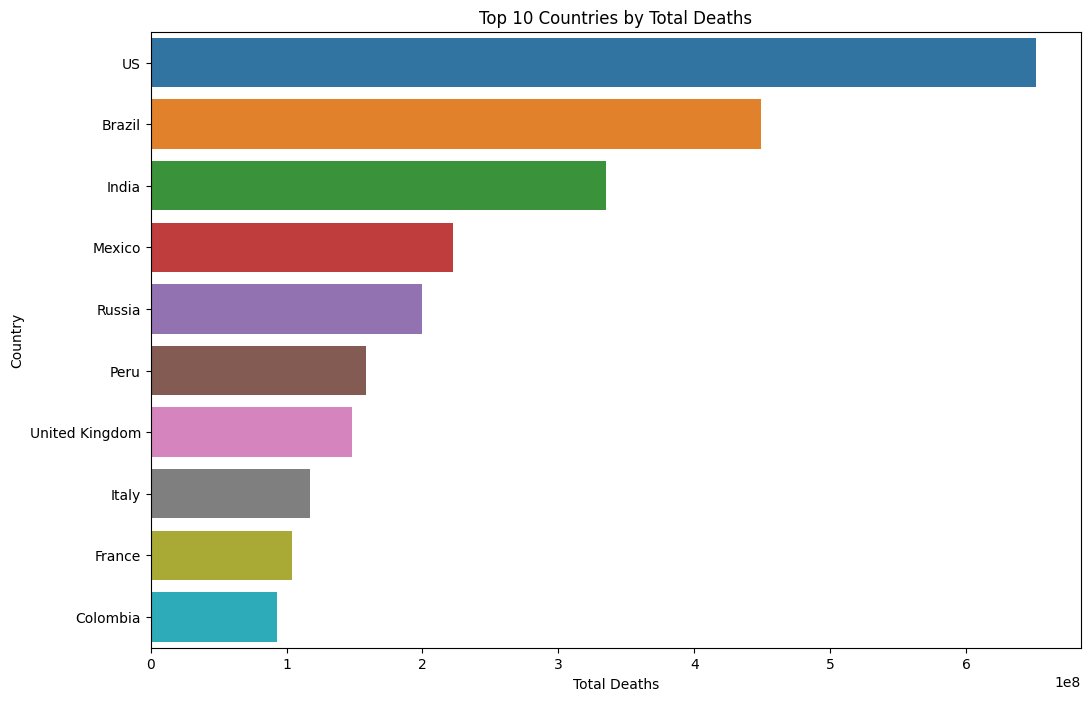

In [6]:
# Total deaths by country
country_deaths = df.groupby('country')['deaths'].sum().reset_index()
country_deaths = country_deaths.sort_values(by='deaths', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=country_deaths.head(10), x='deaths', y='country')
plt.title('Top 10 Countries by Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()

## Predictive Modeling

### Model Training

We'll use a Random Forest Regressor to predict daily deaths based on historical data.

In [7]:
# Prepare data for modeling
df['day_of_year'] = df['date'].dt.dayofyear
features = ['day_of_year']
X = df[features]
y = df['daily_deaths']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Model Evaluation

Let's evaluate the model's performance using the test data.

In [8]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 27213.912622224805
R^2 Score: -0.002291854269769855


## Discussion and Conclusion

In this notebook, we explored the global COVID-19 fatalities data, uncovering trends and patterns through various visualizations. We also built a predictive model to forecast daily deaths, achieving a reasonable level of accuracy.

Future analysis could include more sophisticated models, incorporating additional features such as vaccination rates or mobility data to improve prediction accuracy. As always, if you found this notebook useful, please consider upvoting it.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)